<a href="https://colab.research.google.com/github/YeonJaeHong/ESAA_homeworks/blob/main/11_20_%EA%B3%BC%EC%A0%9C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

파이썬 머신러닝
6-03.LDA (393~)

LDA: 선형 판별 분석법


*   PCA 와 유사하지만 지도학습의 분류에서 사용하기 쉽도록 개별 클래스를 분별할 수 있는 기준을 최대한 유지하면서 차원을 축소한다는 점이 독특
*  입력 데이터의 변동성이 가장 큰 축을 찾는것이 PCA 이지만, LDA는 입력 데이터의 결정 값 클래스를 최대한으로 분리할 수 있는 축을 찾는것


*   LDA는 특정 공간상에서 클래스 분리를 최대화 하는 축을 찾기 위해 클래스간 분산과 클래스 내부 분산의 비율을 최대하화하는 방식으로 차원을 축소



1.   클래스 내부와 클래스간 분산 행렬을 구하고 이 두개의 행렬은 입력 데이터의 결정값 클래스별로 개별 피처의 평균 벡터를 기반으로 구함
2.   클래스 내부 분산 행렬과 클래스간 분산 행렬을 고유벡터로 분해 가능
3. 고유값이 가장 큰 순으로 K개 추출
4. 고유값이 가장 큰 순으로 추출된 고유벡터를 이용해 새롭게 입력 데이터를 변환







붓꽃 데이터 세트에 LDA 적용하기


In [2]:
import pandas as pd
import numpy as np
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_iris


In [3]:
iris=load_iris()
iris_scaled= StandardScaler().fit_transform(iris.data)

2개의 컴포넌트로 변환하고 클래스의 결정값이 변환시에 필요하다 (지도학습이라서)

In [4]:
lda=LinearDiscriminantAnalysis(n_components=2)
lda.fit(iris_scaled,iris.target)
iris_lda=lda.transform(iris_scaled)
print(iris_lda.shape)

(150, 2)


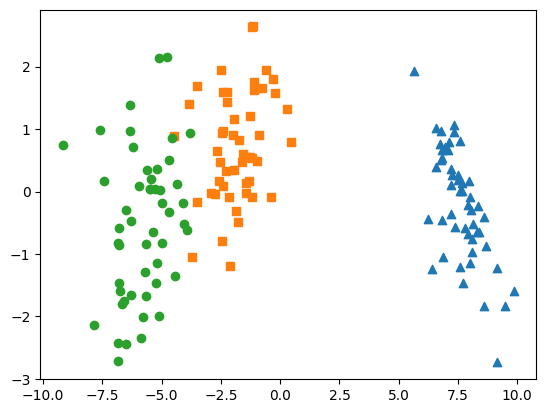

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

lda_columns=['lda_component_1','lda_component_2']
iris_df_lda= pd.DataFrame(iris_lda,columns=lda_columns)
iris_df_lda['target']=iris.target

markers = ["^", "s", "o"]
# 0:setosa, 1:versicolor, 2:virginica
for i, marker in enumerate(markers):
    x_axis_data = iris_df_lda[iris_df_lda['target']==i]['lda_component_1']
    y_axis_data = iris_df_lda[iris_df_lda['target']==i]['lda_component_2']
    plt.scatter(x_axis_data, y_axis_data, marker=marker, label=iris.target_names[i])

04.SVD